In [1]:
import sys
# adiciona app
sys.path.append('../app')

In [2]:
from model_controller import ModelPredictController, ModelTrainController
from plotter import Plotter
from glob import glob
from IPython.display import Image
import config

Para parar o treinamento, criar o arquivo  C:\mestrado\repos-github\chess-attention\stop
Using default size mode:  {'input_shape': (800, 862), 'attention_shape': (50, 53), 'vgg_layer': -2}
Found GPU at: /device:GPU:0
2.5.0
Found GPU at: /device:GPU:0
2.5.0
Found GPU at: /device:GPU:0
Found GPU at: /device:GPU:0
2.5.0


In [4]:
model = ModelPredictController()

In [5]:
model.load()

building...
total do vocabulario=  179
VOCAB_SIZE 180
Shape da imagem ao final da CNN:  (None, 50, 53, 512)
LEARNING_RATE =  0.0005


In [24]:
model.restoreFromCheckpointName('train_20220407_icpr2022_70k_ref_10k_ref_2k_part2_1---8linhas-handwritten-only-2388_best --BEST-79_28--')

restore from pretraining  C:\mestrado\repos-github\chess-attention\train-folder/checkpoints/train_20220407_icpr2022_70k_ref_10k_ref_2k_part2_1---8linhas-handwritten-only-2388_best --BEST-79_28--\ckpt-113 ...


target_len=  16
evaluating dataset  test-8lines-first
evaluating total images:  2 ...
evaluating  0 ...
--------------------<  0 :  carnaval_0004_fullpage.jpg >------------------------------
len: 16 acc: 0.875 cer 0.07291667 file:  C:\mestrado\repos-github\chess-attention/test-data/test-8lines-first\images\carnaval_0004_fullpage.jpg


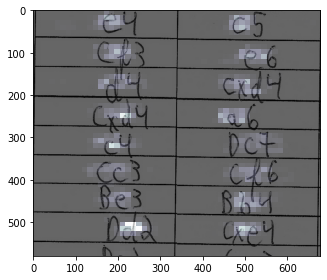

Expected:   e4 c5 Nf3 e6 d4 cxd4 Nxd4 a6 c4 Qc7 Nc3 Nf6 Be3 Bb4 Qd2 Nxe4 
Predicted:  e4 c5 Nf3 e6 d4 cxd4 Nxd4 g6 c4 Bg7 Nc3 Nf6 Be3 Bb4 Qd2 Nxe4 


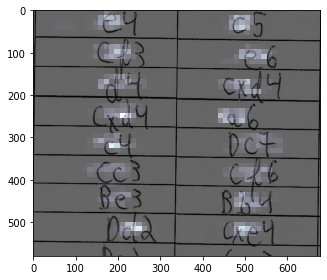

Expected:   e4 c5 Nf3 e6 d4 cxd4 Nxd4 a6 c4 Qc7 Nc3 Nf6 Be3 Bb4 Qd2 Nxe4 
Predicted:  e4 c5 Nf3 e6 d4 cxd4 Nxd4 g6 c4 Bg7 Nc3 Nf6 Be3 Bb4 Qd2 Nxe4 
C:\mestrado\repos-github\chess-attention/test-data/test-8lines-first\images\carnaval_0004_fullpage.jpg


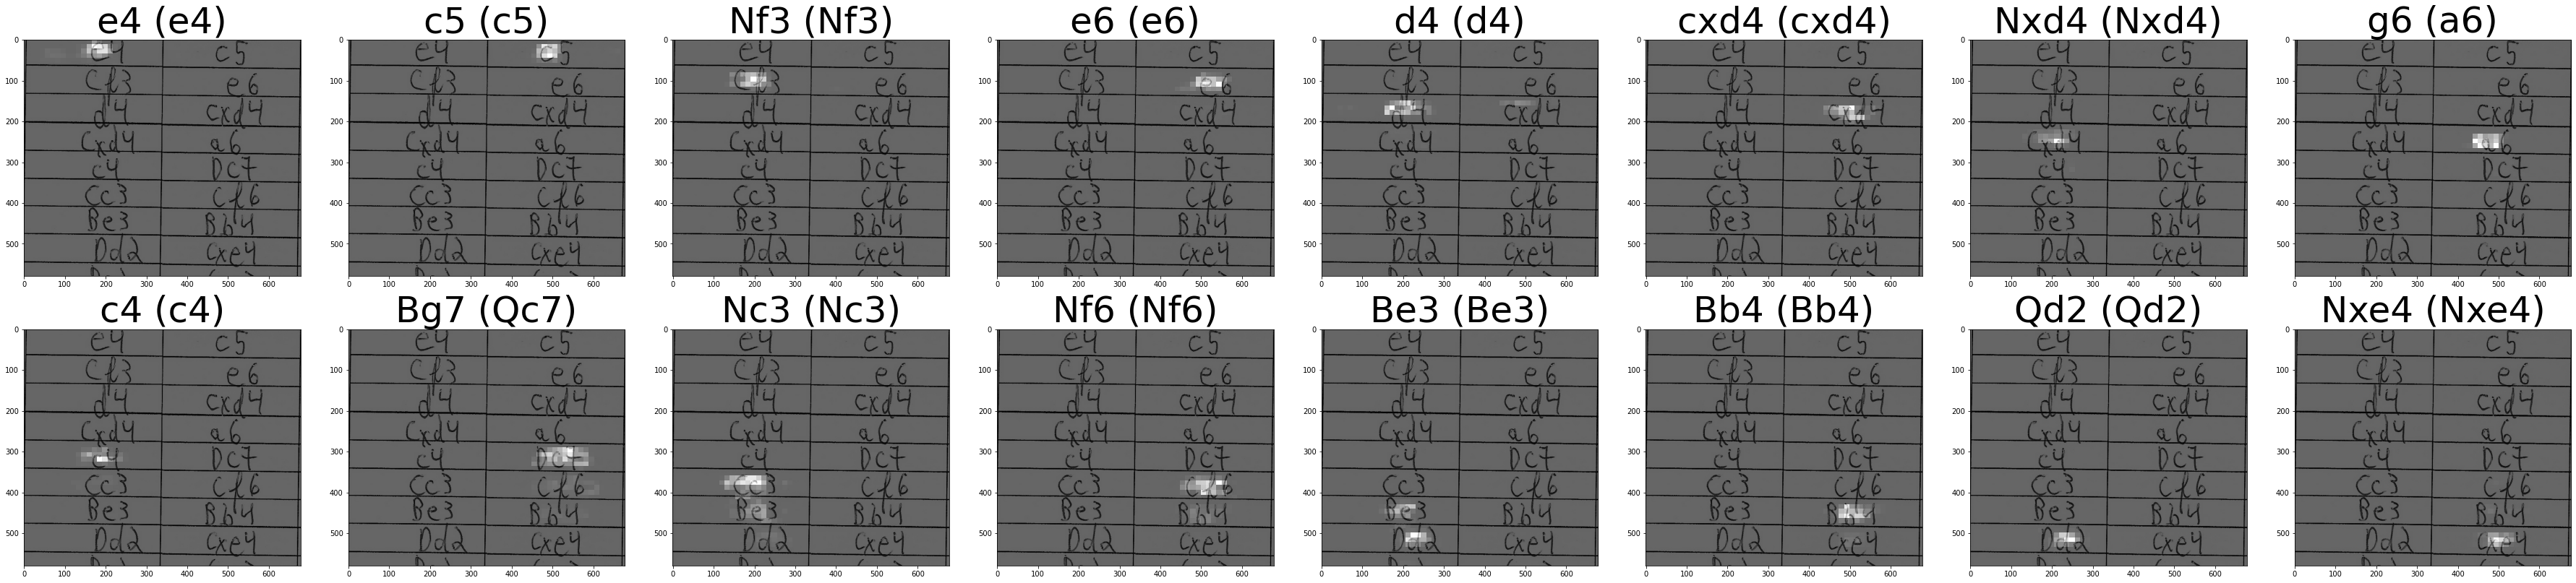

--------------------<  1 :  carnaval_0287_fullpage.jpg >------------------------------
len: 16 acc: 1.0 cer 0.0 file:  C:\mestrado\repos-github\chess-attention/test-data/test-8lines-first\images\carnaval_0287_fullpage.jpg


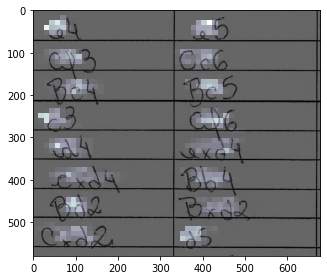

Expected:   e4 e5 Nf3 Nc6 Bc4 Bc5 c3 Nf6 d4 exd4 cxd4 Bb4+ Bd2 Bxd2+ Nbxd2 d5 
Predicted:  e4 e5 Nf3 Nc6 Bc4 Bc5 c3 Nf6 d4 exd4 cxd4 Bb4+ Bd2 Bxd2+ Nbxd2 d5 


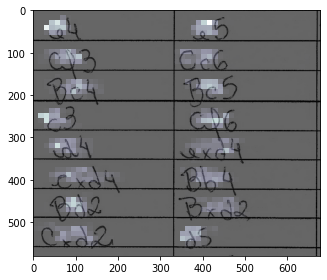

Expected:   e4 e5 Nf3 Nc6 Bc4 Bc5 c3 Nf6 d4 exd4 cxd4 Bb4+ Bd2 Bxd2+ Nbxd2 d5 
Predicted:  e4 e5 Nf3 Nc6 Bc4 Bc5 c3 Nf6 d4 exd4 cxd4 Bb4+ Bd2 Bxd2+ Nbxd2 d5 
C:\mestrado\repos-github\chess-attention/test-data/test-8lines-first\images\carnaval_0287_fullpage.jpg


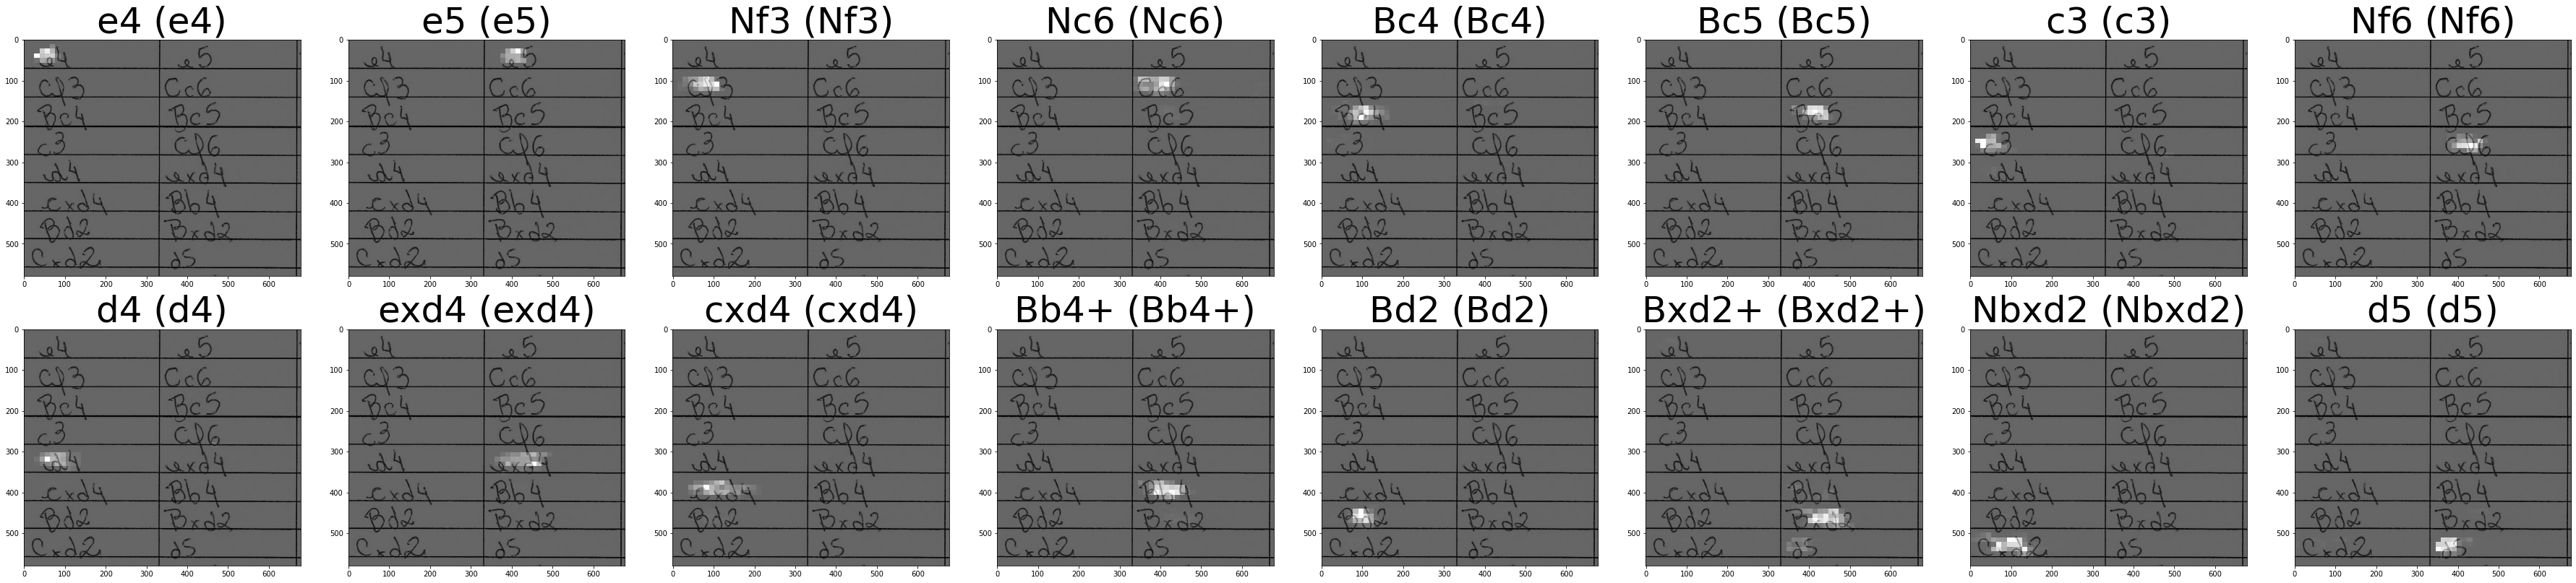

[([1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   0.9375,
   0.9444444179534912,
   0.8999999761581421,
   0.9090909361839294,
   0.9166666865348816,
   0.9230769276618958,
   0.9285714030265808,
   0.9333333373069763,
   0.9375],
  [0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.03125,
   0.02777777798473835,
   0.05833333730697632,
   0.053030308336019516,
   0.0486111156642437,
   0.044871799647808075,
   0.0416666679084301,
   0.03888889029622078,
   0.0364583358168602],
  'test-8lines-first')]

In [25]:
config.PLOT_UNIFIED = True
model.evaluateForTest('test-8lines-first', plot_attention=True, _len= 16)

In [26]:
image = 'C:/mestrado/repos-github/chess-attention/test-data/test-8lines-first/images/carnaval_0004_fullpage.jpg'
r, attention_plot, _ = model.predictOneImage( image)

In [27]:
import config
config.size_mode['attention_shape']

(50, 53)

In [28]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


In [29]:
len(attention_plot)

16

In [58]:
big_array = np.random.rand(1000000)
min( big_array)

9.51227041579017e-08

In [96]:
m = np.zeros( (2,3))
m[0,0]= 0.5
m[1,0]= 2
print( m)
print( np.clip( m, 0, 1.5))
n = np.copy( m)

[[0.5 0.  0. ]
 [2.  0.  0. ]]
[[0.5 0.  0. ]
 [1.5 0.  0. ]]


In [97]:
n[ n<= 0.5] = 0.75
print( m)
print( n)

[[0.5 0.  0. ]
 [2.  0.  0. ]]
[[0.75 0.75 0.75]
 [2.   0.75 0.75]]


In [94]:
print( m)

[[0.75 0.75 0.75]
 [2.   0.75 0.75]]


min 1.0422899407177152e-11 max 0.17674398036521488
min 0 max 255


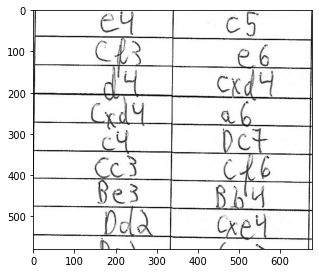

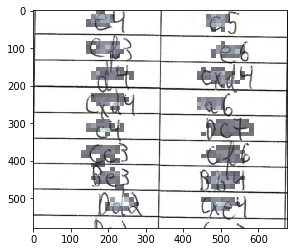

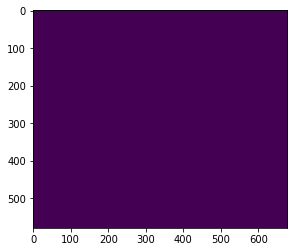

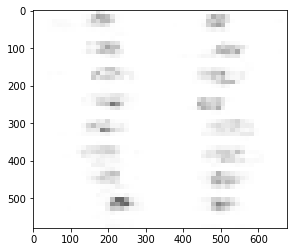

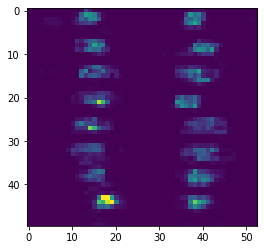

In [105]:
def plot_attention_unified( image, attention_plot):
    plt.figure(figsize=(5, 6))
    temp_image = np.array(Image.open(image))
    temp_att = np.resize(np.sum( attention_plot, axis=0), config.size_mode['attention_shape'])
    
    print( 'min', np.min( temp_att), 'max', np.max( temp_att))
    print( 'min', np.min( temp_image), 'max', np.max( temp_image))
    
    img = plt.imshow(temp_image)
    plt.show()
    
    m = np.copy( temp_att)
    m[ m<= 1.0e-2] = 0
    m[ m> 0] = 0.6
    
    img = plt.imshow(temp_image)
    plt.imshow(temp_att , cmap='bone', 
               alpha=m, extent=img.get_extent())
    plt.show()

    plt.imshow(np.full(config.size_mode['attention_shape'], 0), extent=img.get_extent())
    plt.show()

    
    plt.imshow(temp_att, cmap='binary', alpha=0.6, extent=img.get_extent())
#     plt.tight_layout()
    plt.show()

    plt.imshow(temp_att)
#     plt.tight_layout()
    plt.show()
    

plot_attention_unified( image, attention_plot)

cmap binary


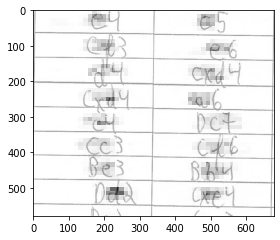

cmap gist_yarg


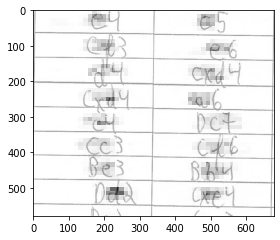

cmap gist_gray


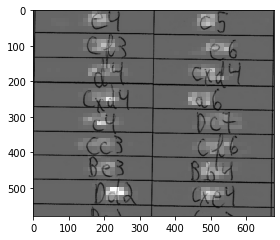

cmap gray


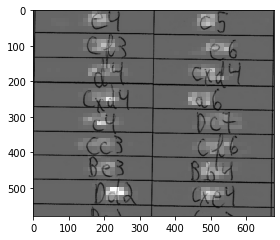

cmap bone


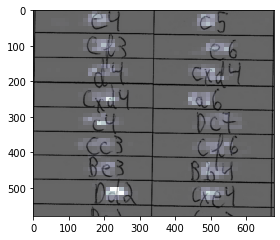

cmap pink


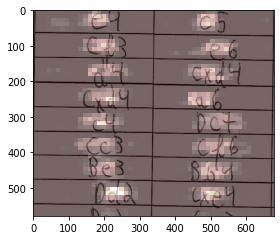

cmap spring


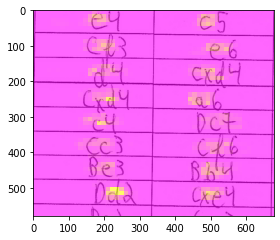

cmap summer


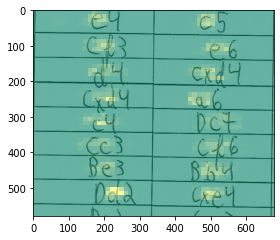

cmap autumn


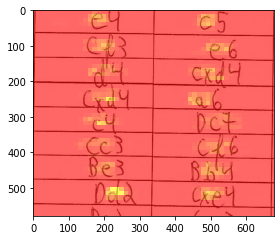

cmap winter


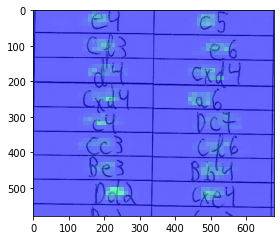

cmap cool


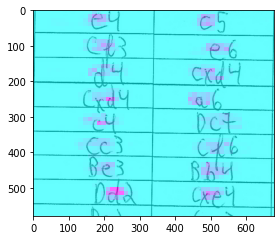

cmap Wistia


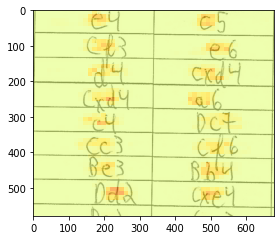

cmap hot


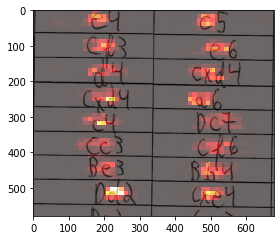

cmap afmhot


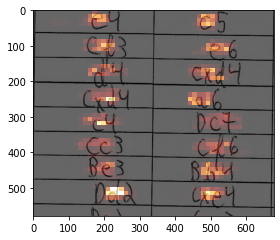

cmap gist_heat


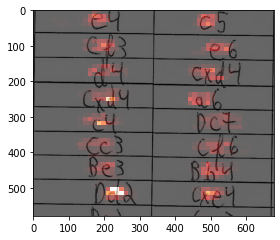

cmap copper


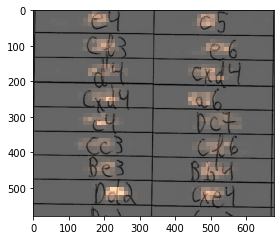

In [31]:
def plot_attention_unified_(image, attention_plot, cmap):
    print( 'cmap', cmap)
    plt.figure(figsize=(4, 5))
    temp_image = np.array(Image.open(image))
    ATTENTION_SHAPE = config.size_mode['attention_shape']
    temp_att = np.resize(np.sum( attention_plot, axis=0), ATTENTION_SHAPE)
    img = plt.imshow(temp_image)
    plt.imshow(temp_att, cmap=cmap, alpha=0.6, extent=img.get_extent())
#     plt.imshow(temp_att, cmap='binary_r', alpha=0.6, extent=img.get_extent())

    plt.tight_layout()
    plt.show()

for cmap in ['binary', 'gist_yarg', 'gist_gray', 'gray', 'bone',
                      'pink', 'spring', 'summer', 'autumn', 'winter', 'cool',
                      'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper']:    
    plot_attention_unified_( image, attention_plot, cmap)

cmap Greys


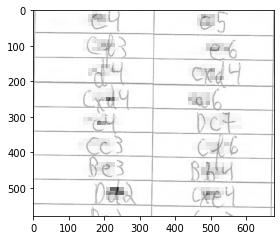

cmap Purples


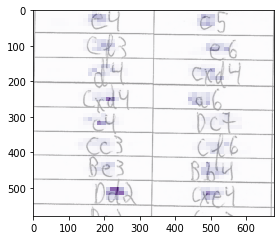

cmap Blues


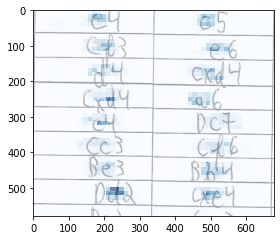

cmap Greens


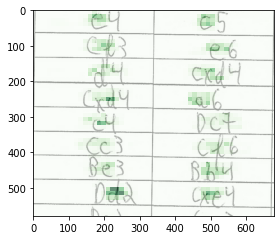

cmap Oranges


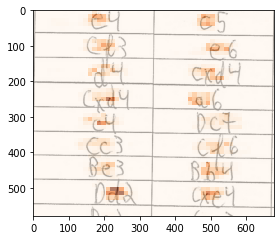

cmap Reds


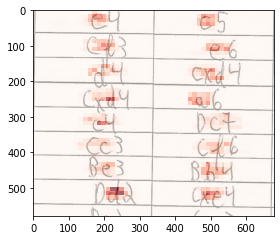

cmap YlOrBr


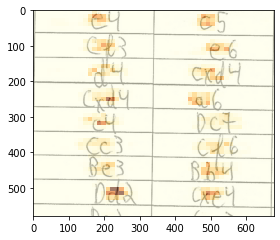

cmap YlOrRd


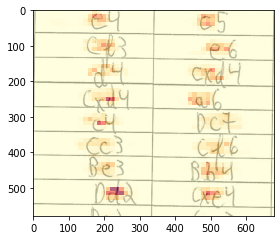

cmap OrRd


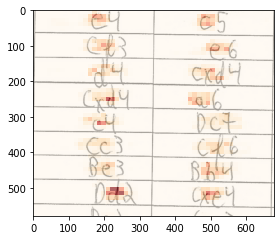

cmap PuRd


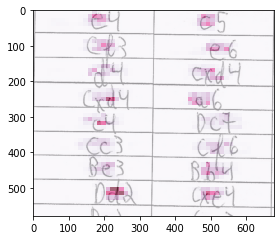

cmap RdPu


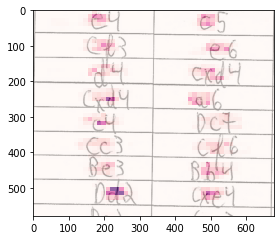

cmap BuPu


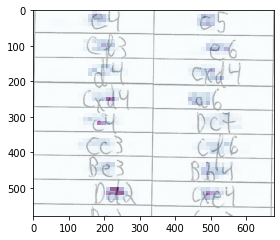

cmap GnBu


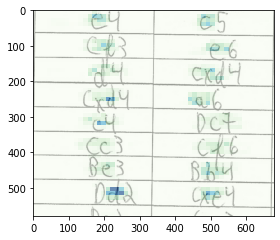

cmap PuBu


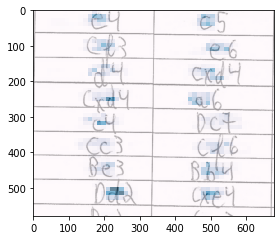

cmap YlGnBu


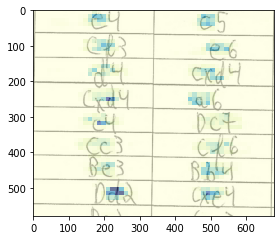

cmap PuBuGn


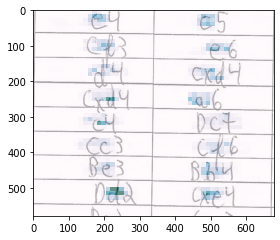

cmap BuGn


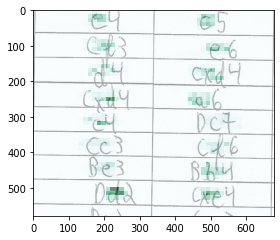

cmap YlGn


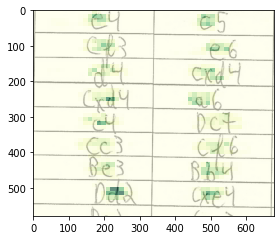

In [32]:
for cmap in ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
                      'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
                      'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']:    
    plot_attention_unified_( image, attention_plot, cmap)

In [33]:
attention_plot.shape

(16, 2650)

In [34]:
np.sum( attention_plot, axis=0).shape

(2650,)

In [35]:
50*53

2650

In [36]:
from termcolor import colored

In [37]:
colored

<function termcolor.colored(text, color=None, on_color=None, attrs=None)>

In [38]:
print(colored('hello', 'red'), colored('world', 'green'))

hello world


In [39]:
print( 'a', end='')
print( 'b')

ab


In [40]:
def print_result( expected, result):
    print( colored( 'Expected:  ', attrs=['bold']), end=' ')
    for i in range( 0, len( expected)):
        print( expected[i], end=' ')
    print()
    print( colored( 'Predicted: ', attrs=['bold']), end=' ')
    for i in range( 0, len( expected)):
        if( expected[i]!= result[i]):
            for c in result[i]:
                if c not in expected[i]:
                    print( colored( c, 'red', attrs=['bold']), end='')
                else:
                    print( colored( c, 'red'), end='')
            print(' ', end='')
        else:
            print( result[i], end=' ')
    print()
    
print_result( ['ab', 'cd', 'ef'], ['ab', 'c', 'eed'])

Expected:   ab cd ef 
Predicted:  ab c eed 


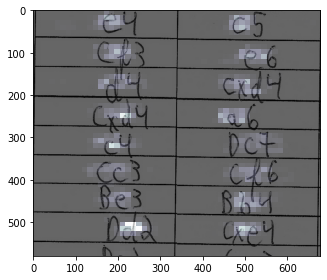

Expected:   ab c ee 
Predicted:  ab cd ef 


In [41]:
def plot_attention_unified__( image, result, attention_plot, expected=None):
    temp_image = np.array(Image.open(image))
    temp_att = np.resize(np.sum( attention_plot, axis=0), config.size_mode['attention_shape'])
    img = plt.imshow(temp_image)
    plt.imshow(temp_att, cmap='bone', alpha=0.6, extent=img.get_extent())

    plt.tight_layout()
    plt.show()
    if expected is not None:
        print_result( expected, result)

result = ['ab', 'cd', 'ef']
expected = ['ab', 'c', 'ee']
plot_attention_unified__( image, result, attention_plot, expected)